# Preparations

In [6]:
%load_ext autoreload
%autoreload 2

import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
colors     = ['#CC002E',  'orange']


In [8]:
unweighted_events_dir = '../data/unweighted_events'

theta0 = 276 # settings.theta_benchmark_nottrained
theta1 = 0 #settings.theta1_default

X = np.load(unweighted_events_dir + '/X_train_point_by_point_' + str(theta0) + '.npy')
smeared_X = np.load(unweighted_events_dir + '/smeared_X_train_point_by_point_' + str(theta0) + '.npy')
y = np.load(unweighted_events_dir + '/y_train_point_by_point_' + str(theta0) + '.npy')

X0 = X[y==0]
smeared_X0 = smeared_X[y==0]

if theta1 == settings.theta1_default:
    X1 = X[y==1]
    smeared_X1 = smeared_X[y==1]
else:
    X = np.load(unweighted_events_dir + '/X_train_point_by_point_' + str(theta1) + '.npy')
    smeared_X = np.load(unweighted_events_dir + '/smeared_X_train_point_by_point_' + str(theta1) + '.npy')
    y = np.load(unweighted_events_dir + '/y_train_point_by_point_' + str(theta1) + '.npy')
    X1 = X[y==0]
    smeared_X1 = smeared_X[y==0]

ValueError: cannot reshape array of size 3710956 into shape (997796,42)

In [12]:
margin_l_absolute = 8. * 0.1
margin_r_absolute = 8. * 0.02
margin_sep_absolute = 8. * 0.02
margin_t_absolute = 8. * 0.02
margin_b_absolute = 8. * 0.08

def calculate_height(n_panels=2, width=8.):
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels - 1)*margin_sep_total) / n_panels
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    
    # Calculate horizontal margins. Units: relative to width.
    height = panel_height_absolute + margin_t_absolute + margin_b_absolute
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    
    # Return height
    return height


def adjust_margins(n_panels=2, width=8.):
    
    # Calculate horizontal margins. Units: relative to width.
    margin_l = margin_l_absolute / width
    margin_r = margin_r_absolute / width
    margin_l_subsequent = margin_l
    if n_panels > 2:
        margin_l_subsequent = margin_r
    margin_sep = margin_sep_absolute / width
    if n_panels > 2:
        margin_sep = 0
    margin_sep_total = margin_r + margin_sep + margin_l_subsequent
    panel_width = (1. - margin_l - margin_r - (n_panels - 1)*margin_sep_total) / n_panels
    
    # Calculate wspace argument of subplots_adjust
    wspace = margin_sep_total / panel_width
    
    # Calculate absolute height
    panel_height_absolute = panel_width * width # Square plots
    
    # Calculate horizontal margins. Units: relative to width.
    height = panel_height_absolute + margin_t_absolute + margin_b_absolute
    panel_height = panel_height_absolute / height
    margin_t = margin_t_absolute / height
    margin_b = margin_b_absolute / height
    
    # Set margins
    plt.subplots_adjust(left = margin_l,
                        right = 1. - margin_r,
                        bottom = margin_b,
                        top = 1. - margin_t,
                        wspace = wspace)
    
print(calculate_height(2,8.))
print(calculate_height(3,8.))

3.7600000000000002
2.9333333333333336


# Feature histograms

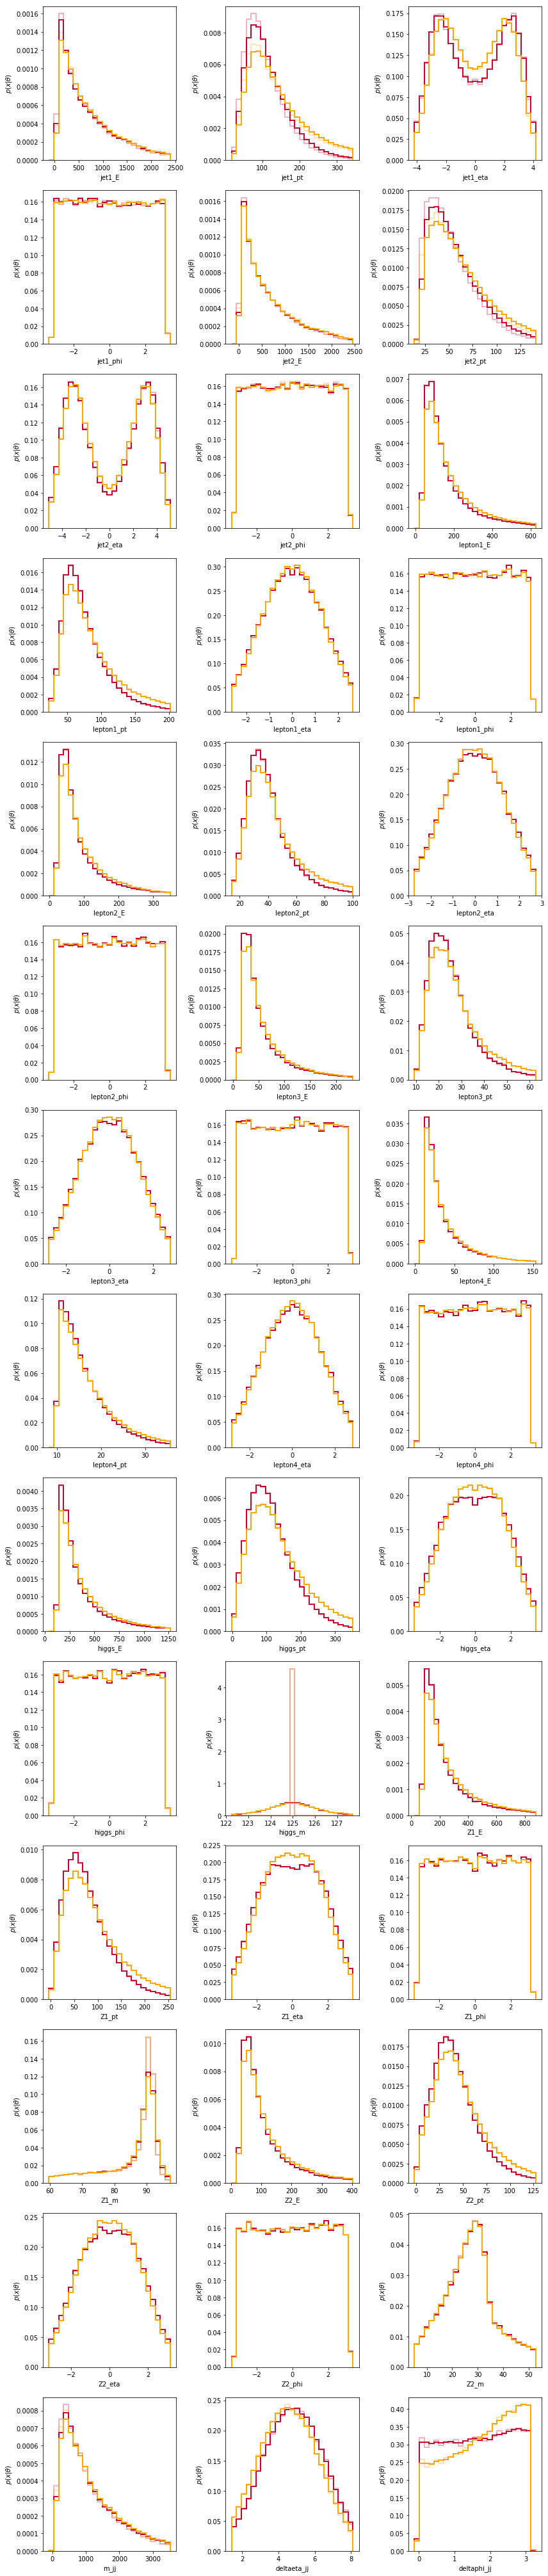

In [13]:
n_bins = 25
n_rows = math.ceil(settings.n_features / 3)

plt.figure(figsize=(3*4., n_rows*4.))

for i, label in enumerate(settings.feature_labels):
    
    plt.subplot(n_rows, 3, i+1)
    
    xmin = np.percentile(smeared_X0[:, i],5)
    xmax = np.percentile(smeared_X0[:, i],95)
    temp = xmax - xmin
    xmin = xmin - temp * 0.1
    xmax = xmax + temp * 0.1

    #plt.hist(X_test[:, i],
    #         range=(xmin,xmax), bins=n_bins,
    #         alpha=0.2, color='C0')
    #plt.hist(X_test[:, i],
    #         range=(xmin,xmax), bins=n_bins,
    #         alpha=0.2, color='C1')

    plt.hist(X0[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', alpha=0.3, color=colors[0], ls='-', lw=2.)
    plt.hist(X1[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', alpha=0.3, color=colors[1], ls='-', lw=2.)

    plt.hist(smeared_X0[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', color=colors[0], ls='-', lw=2.)
    plt.hist(smeared_X1[:, i],
             normed=True,
             range=(xmin,xmax), bins=n_bins,
             histtype='step', color=colors[1], ls='-', lw=2.)

    plt.xlabel(label)
    plt.ylabel(r'$p(x|\theta)$')
    
plt.tight_layout()
plt.savefig('../figures/data/x_histograms.pdf')

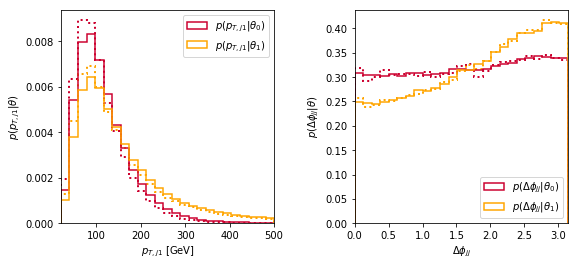

In [14]:
n_bins = 25

plt.figure(figsize=(8., calculate_height(2,8.)))
    
    
    
plt.subplot(1, 2, 1)

plt.hist(X0[:, 1],
         normed=True,
         range=(20.,500.), bins=n_bins,
         histtype='step', color=colors[0], ls=':', lw=2.,)
plt.hist(X1[:, 1],
         normed=True,
         range=(20.,500.), bins=n_bins,
         histtype='step', color=colors[1], ls=':', lw=2.)
plt.hist(smeared_X0[:, 1],
         normed=True,
         range=(20.,500.), bins=n_bins,
         histtype='step', color=colors[0], ls='-', lw=1.5,
         label=r'$p(p_{T,j1}|\theta_0)$')
plt.hist(smeared_X1[:, 1],
         normed=True,
         range=(20.,500.), bins=n_bins,
         histtype='step', color=colors[1], ls='-', lw=1.5,
         label=r'$p(p_{T,j1}|\theta_1)$')

plt.legend()

plt.xlabel(r'$p_{T,j1}$ [GeV]')
plt.ylabel(r'$p(p_{T,j1}|\theta)$')
plt.xlim(20.,500.)
    
    
    
plt.subplot(1, 2, 2)

plt.hist(X0[:, 41],
         normed=True,
         range=(0.,np.pi), bins=n_bins,
         histtype='step', color=colors[0], ls=':', lw=2.)
plt.hist(X1[:, 41],
         normed=True,
         range=(0.,np.pi), bins=n_bins,
         histtype='step', color=colors[1], ls=':', lw=2.)
plt.hist(smeared_X0[:, 41],
         normed=True,
         range=(0.,np.pi), bins=n_bins,
         histtype='step', color=colors[0], ls='-', lw=1.5,
         label=r'$p(\Delta\phi_{jj}|\theta_0)$')
plt.hist(smeared_X1[:, 41],
         normed=True,
         range=(0.,np.pi), bins=n_bins,
         histtype='step', color=colors[1], ls='-', lw=1.5,
         label=r'$p(\Delta\phi_{jj}|\theta_1)$')

plt.legend(loc='lower right')

plt.xlabel(r'$\Delta\phi_{jj}$')
plt.ylabel(r'$p(\Delta\phi_{jj}|\theta)$')
plt.xlim(0.,np.pi)
    
    
    
adjust_margins(2, 8.)
plt.savefig('../figures/paper/features.pdf')

# Scatter plot parton level vs smeared

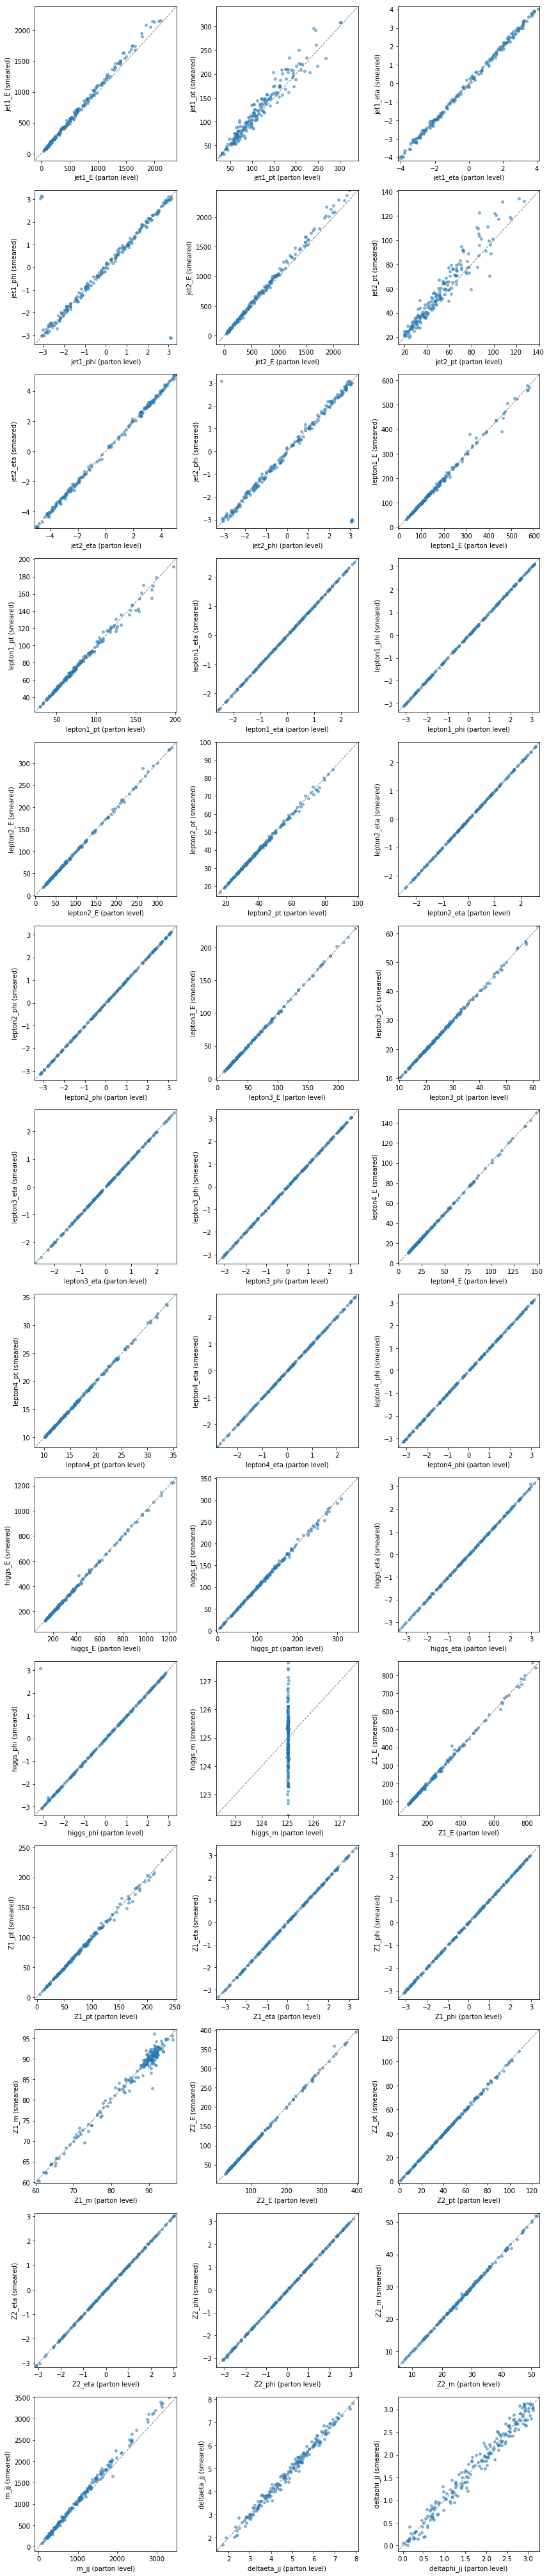

In [4]:
skip = 2500
n_rows = math.ceil(settings.n_features / 3)

plt.figure(figsize=(3*4., n_rows*4.))

for i, label in enumerate(settings.feature_labels):
    
    plt.subplot(n_rows, 3, i+1)
    
    xmin = np.percentile(smeared_X0[:, i],5)
    xmax = np.percentile(smeared_X0[:, i],95)
    temp = xmax - xmin
    xmin = xmin - temp * 0.1
    xmax = xmax + temp * 0.1
    
    plt.plot([-100.,10000.],[-100.,10000.], ls='dashed', lw=1., c='0.5')
    
    plt.scatter(X0[::skip, i], smeared_X0[::skip, i],
                s=15., alpha=0.5, color='C0')
    
    plt.xlim(xmin,xmax)
    plt.ylim(xmin,xmax)

    plt.xlabel(label + ' (parton level)')
    plt.ylabel(label + ' (smeared)')
    
plt.tight_layout()
plt.savefig('../figures/data/x_smearing_scatter.pdf')